<a href="https://colab.research.google.com/github/sharvaniyadav/ECE1512-Digital-Image-Processing-/blob/main/FINAL_ECE1512_Assignment_1_Sharvani_Yadav_ipynbFi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== STEP 1: IMPORTS AND HELPER FUNCTIONS ===

=== STEP 2: LOADING AND NORMALIZING IMAGE ===
Image shape: (976, 746) Data type: uint8 Min/Max pixel values: 0 255
After normalization -> Min: 0.0 Max: 1.0
Displaying original normalized image...


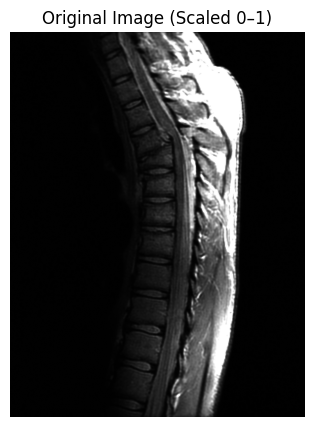


=== STEP 3: LOG TRANSFORMATION ===
Displaying log-transformed image...


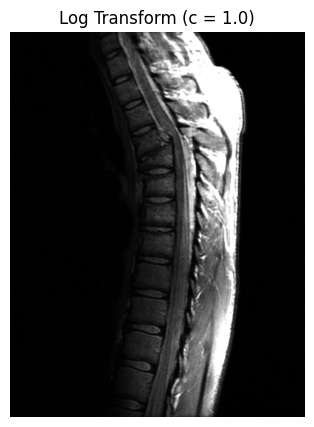


=== STEP 4: GAMMA TRANSFORMATION EXPERIMENTS ===
Displaying results for multiple gamma values...


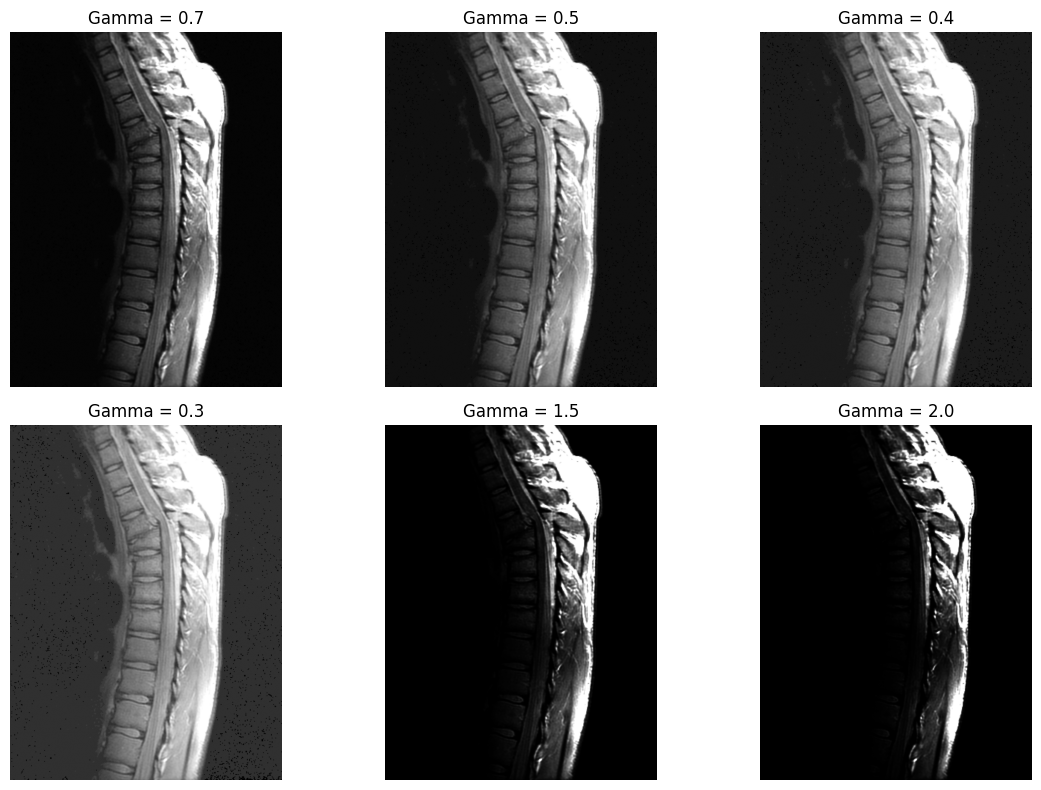


=== STEP 5: FINAL CHOSEN LOG & GAMMA RESULTS ===
Displaying final chosen log result...


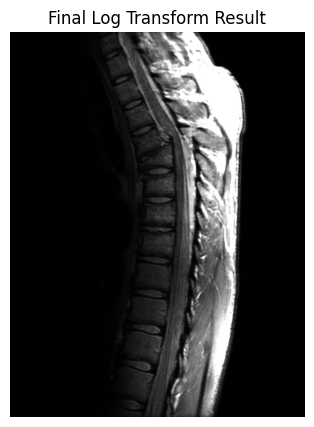

Displaying final chosen gamma result...


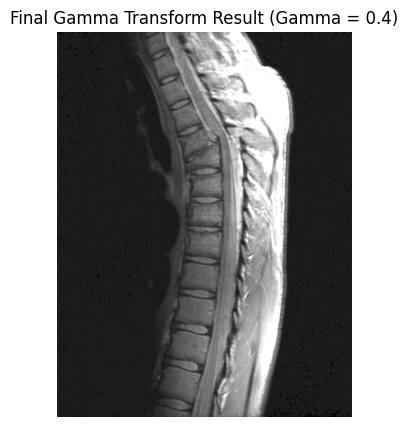

Saved files:
- /content/partA_log_result.png
- /content/partA_gamma_result.png

=== STEP 6: COMPARISON FIGURE ===


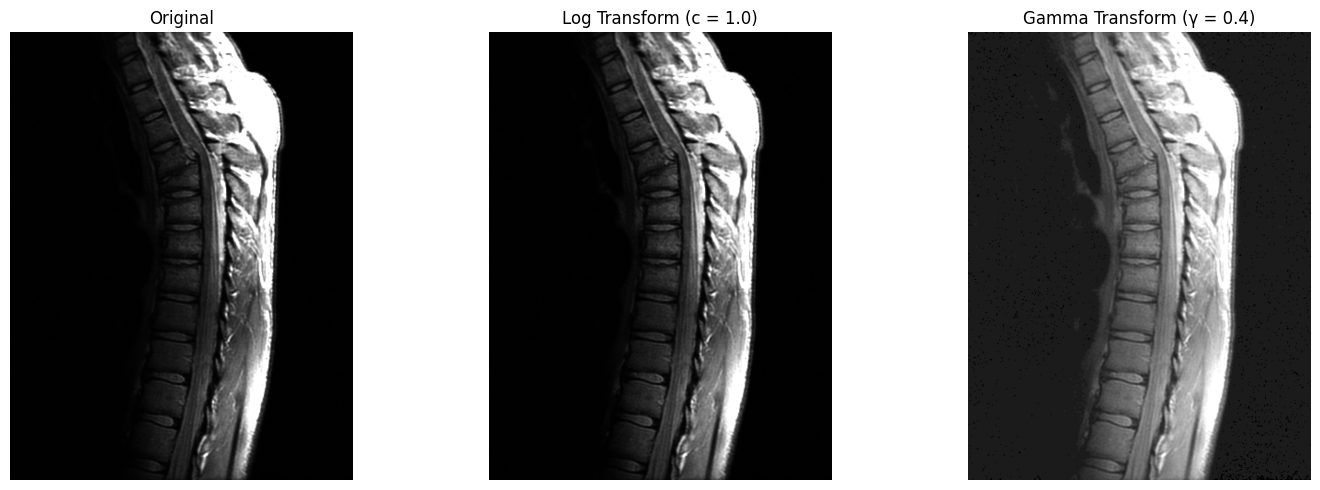


=== STEP 7: QUICK SUMMARY FOR REPORT ===

Part A Summary:
• I used the log transform with c = 1.0. It slightly brightened the darker parts of the image while
  compressing the brighter areas, so the bright spine region stayed visible but not overexposed.
• I used the gamma transform with γ = 0.4. Since γ < 1, it brightened the dark regions even more
  and made fine details in the spine stand out clearly.
• Comparing the two:
  – The log transform gave a more subtle overall brightening effect.
  – The gamma transform with γ = 0.4 gave a stronger enhancement to the shadows, which made
    structures easier to see without losing too much contrast.



In [7]:
# Part A: Image Enhancement Using Intensity Transformations

# ----------------------------
# Step 1: Setup and helper functions
# ----------------------------
print("\n=== STEP 1: IMPORTS AND HELPER FUNCTIONS ===")
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image_data, title_text=""):
    plt.figure(figsize=(5, 5))
    plt.imshow(image_data, cmap="gray", vmin=0, vmax=1)
    plt.title(title_text)
    plt.axis("off")
    plt.show()

def convert_to_8bit(image_data):
    image_scaled = np.round(image_data * 255)
    image_scaled = np.clip(image_scaled, 0, 255)
    return image_scaled.astype(np.uint8)

# ----------------------------
# Step 2: Load and normalize image
# ----------------------------
print("\n=== STEP 2: LOADING AND NORMALIZING IMAGE ===")
image_path = "/content/fig38a.tif"
image_original = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

if image_original.ndim == 3:
    image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

print("Image shape:", image_original.shape,
      "Data type:", image_original.dtype,
      "Min/Max pixel values:", image_original.min(), image_original.max())

if np.issubdtype(image_original.dtype, np.integer):
    max_pixel_value = np.iinfo(image_original.dtype).max
else:
    max_pixel_value = image_original.max() if image_original.max() > 0 else 1.0

image_normalized = image_original.astype(np.float32) / float(max_pixel_value)
print("After normalization -> Min:", float(image_normalized.min()),
      "Max:", float(image_normalized.max()))

print("Displaying original normalized image...")
display_image(image_normalized, "Original Image (Scaled 0–1)")

# ----------------------------
# Step 3: Log transform
# ----------------------------
print("\n=== STEP 3: LOG TRANSFORMATION ===")
def apply_log_transform(input_image, c_value=1.0):
    log_result = c_value * np.log1p(input_image)
    log_result = (log_result - log_result.min()) / (log_result.max() - log_result.min() + 1e-8)
    return log_result.astype(np.float32)

log_image_result = apply_log_transform(image_normalized, c_value=1.0)
print("Displaying log-transformed image...")
display_image(log_image_result, "Log Transform (c = 1.0)")

# ----------------------------
# Step 4: Gamma transform experiments
# ----------------------------
print("\n=== STEP 4: GAMMA TRANSFORMATION EXPERIMENTS ===")
def apply_gamma_transform(input_image, gamma_value=0.5, c_value=1.0):
    gamma_result = c_value * np.power(input_image, float(gamma_value))
    gamma_result = (gamma_result - gamma_result.min()) / (gamma_result.max() - gamma_result.min() + 1e-8)
    return gamma_result.astype(np.float32)

gamma_values_to_test = [0.7, 0.5, 0.4, 0.3, 1.5, 2.0]
print("Displaying results for multiple gamma values...")
num_images = len(gamma_values_to_test)
num_columns = 3
num_rows = int(np.ceil(num_images / num_columns))

plt.figure(figsize=(12, 4 * num_rows))
for index, gamma_val in enumerate(gamma_values_to_test, 1):
    plt.subplot(num_rows, num_columns, index)
    plt.imshow(apply_gamma_transform(image_normalized, gamma_value=gamma_val), cmap="gray", vmin=0, vmax=1)
    plt.title(f"Gamma = {gamma_val}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# ----------------------------
# Step 5: Final chosen results
# ----------------------------
print("\n=== STEP 5: FINAL CHOSEN LOG & GAMMA RESULTS ===")
final_c_value = 1.0
final_gamma_value = 0.4

final_log_result = apply_log_transform(image_normalized, c_value=final_c_value)
final_gamma_result = apply_gamma_transform(image_normalized, gamma_value=final_gamma_value)

print("Displaying final chosen log result...")
display_image(final_log_result, "Final Log Transform Result")
print("Displaying final chosen gamma result...")
display_image(final_gamma_result, f"Final Gamma Transform Result (Gamma = {final_gamma_value})")

cv2.imwrite("/content/partA_log_result.png", convert_to_8bit(final_log_result))
cv2.imwrite("/content/partA_gamma_result.png", convert_to_8bit(final_gamma_result))

print("Saved files:")
print("- /content/partA_log_result.png")
print("- /content/partA_gamma_result.png")

# ----------------------------
# Step 6: Side-by-side comparison
# ----------------------------
print("\n=== STEP 6: COMPARISON FIGURE ===")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(image_normalized, cmap="gray", vmin=0, vmax=1); plt.title("Original"); plt.axis("off")
plt.subplot(1, 3, 2); plt.imshow(final_log_result, cmap="gray", vmin=0, vmax=1); plt.title(f"Log Transform (c = {final_c_value})"); plt.axis("off")
plt.subplot(1, 3, 3); plt.imshow(final_gamma_result, cmap="gray", vmin=0, vmax=1); plt.title(f"Gamma Transform (γ = {final_gamma_value})"); plt.axis("off")
plt.tight_layout()
plt.show()

# ----------------------------
# Step 7: Quick write-up summary
# ----------------------------
print("\n=== STEP 7: QUICK SUMMARY FOR REPORT ===")
summary = f"""
Part A Summary:
• I used the log transform with c = {final_c_value}. It slightly brightened the darker parts of the image while
  compressing the brighter areas, so the bright spine region stayed visible but not overexposed.
• I used the gamma transform with γ = {final_gamma_value}. Since γ < 1, it brightened the dark regions even more
  and made fine details in the spine stand out clearly.
• Comparing the two:
  – The log transform gave a more subtle overall brightening effect.
  – The gamma transform with γ = {final_gamma_value} gave a stronger enhancement to the shadows, which made
    structures easier to see without losing too much contrast.
"""
print(summary)


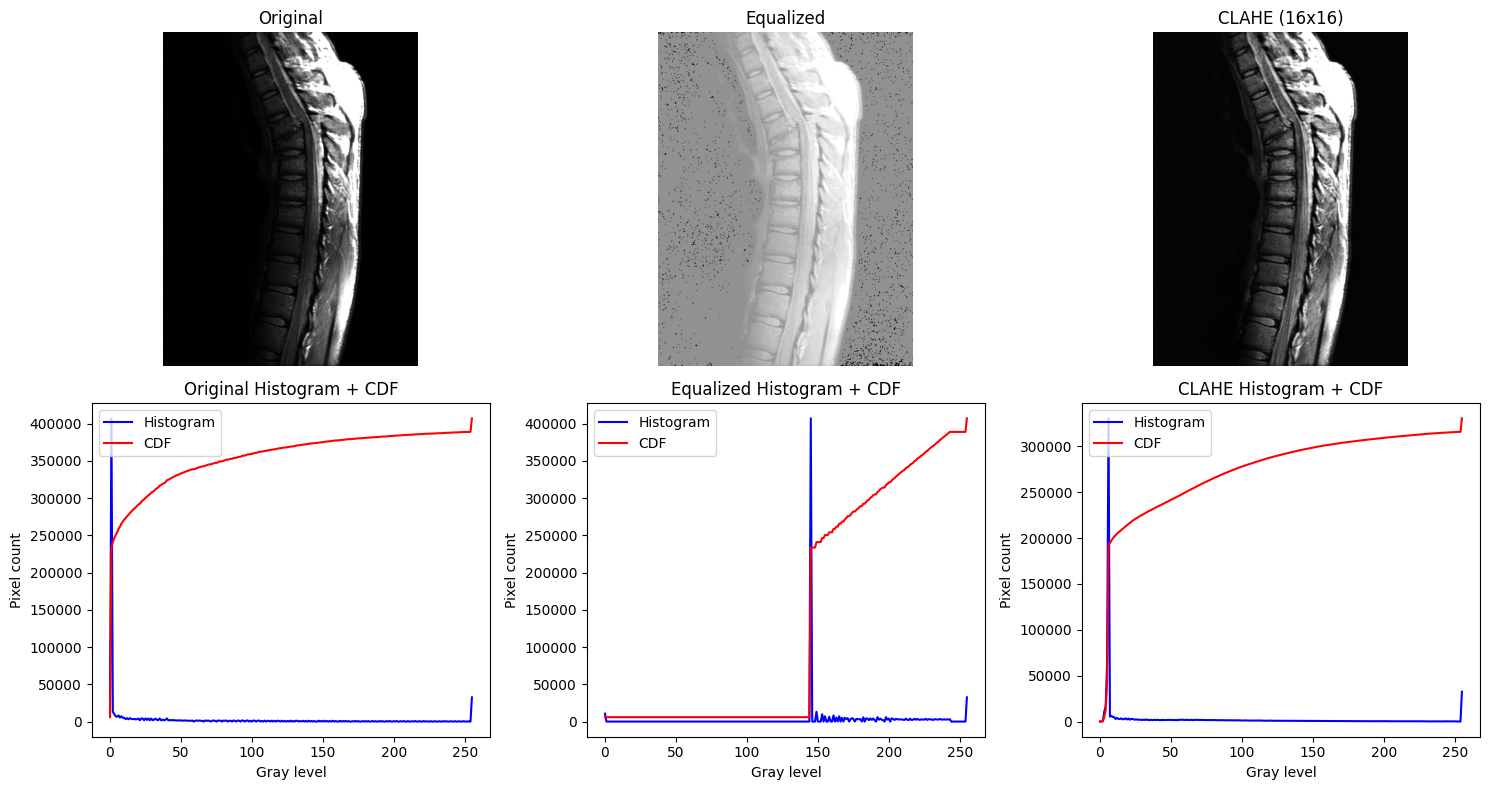

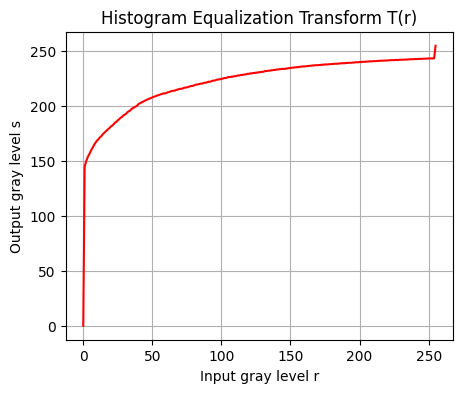

In [8]:
# Part B: Histogram Equalization
# I computed the original histogram, applied global histogram equalization,
# plotted the transformation function, and compared with CLAHE.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# I loaded the original image as grayscale
img_orig = cv2.imread("/content/fig38a.tif", cv2.IMREAD_GRAYSCALE)

# I calculated the histogram and CDF of the original image
hist_orig = cv2.calcHist([img_orig], [0], None, [256], [0, 256])
cdf_orig = hist_orig.cumsum()
cdf_orig_norm = cdf_orig * float(hist_orig.max()) / cdf_orig.max()

# I applied global histogram equalization
img_eq = cv2.equalizeHist(img_orig)

# I calculated histogram and CDF for the equalized image
hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0, 256])
cdf_eq = hist_eq.cumsum()
cdf_eq_norm = cdf_eq * float(hist_eq.max()) / cdf_eq.max()

# I applied CLAHE (localized equalization) with a 16x16 grid
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
img_clahe = clahe.apply(img_orig)

# I calculated histogram and CDF for the CLAHE image
hist_clahe = cv2.calcHist([img_clahe], [0], None, [256], [0, 256])
cdf_clahe = hist_clahe.cumsum()
cdf_clahe_norm = cdf_clahe * float(hist_clahe.max()) / cdf_clahe.max()

# I plotted the results in a 2-row layout
plt.figure(figsize=(15, 8))

# Row 1: images
plt.subplot(2, 3, 1); plt.imshow(img_orig, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(2, 3, 2); plt.imshow(img_eq, cmap='gray'); plt.title("Equalized"); plt.axis('off')
plt.subplot(2, 3, 3); plt.imshow(img_clahe, cmap='gray'); plt.title("CLAHE (16x16)"); plt.axis('off')

# Row 2: histograms + CDFs with legends
plt.subplot(2, 3, 4)
plt.plot(hist_orig, label="Histogram", color='blue')
plt.plot(cdf_orig_norm, label="CDF", color='red')
plt.title("Original Histogram + CDF")
plt.xlabel("Gray level"); plt.ylabel("Pixel count")
plt.legend(loc="upper left")

plt.subplot(2, 3, 5)
plt.plot(hist_eq, label="Histogram", color='blue')
plt.plot(cdf_eq_norm, label="CDF", color='red')
plt.title("Equalized Histogram + CDF")
plt.xlabel("Gray level"); plt.ylabel("Pixel count")
plt.legend(loc="upper left")

plt.subplot(2, 3, 6)
plt.plot(hist_clahe, label="Histogram", color='blue')
plt.plot(cdf_clahe_norm, label="CDF", color='red')
plt.title("CLAHE Histogram + CDF")
plt.xlabel("Gray level"); plt.ylabel("Pixel count")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

# I plotted the histogram equalization transform function T(r)
cdf_norm = (cdf_orig - cdf_orig.min()) * 255 / (cdf_orig.max() - cdf_orig.min())
plt.figure(figsize=(5, 4))
plt.plot(cdf_norm, color='red')
plt.title("Histogram Equalization Transform T(r)")
plt.xlabel("Input gray level r")
plt.ylabel("Output gray level s")
plt.grid()
plt.show()